<a href="https://colab.research.google.com/github/itrinia/code-TA/blob/main/ta_ileene_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library

In [1]:
!pip install numpy==1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is

In [1]:
import numpy as np

In [2]:
np.__version__

'1.24.3'

# kaggle api set up

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ileenetrinia","key":"952ebd8e75b01c8ce4e3d354d8d22cc6"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ileenetrinia/docunet-sroie-merged --unzip

Dataset URL: https://www.kaggle.com/datasets/ileenetrinia/docunet-sroie-merged
License(s): other


# load dataset

In [6]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Path to image folders
sroie_folder = "/content/SROIE2019/train"
docunet_folder = "/content/DocUNet_dataset/image"

# Function to get image files from a folder
def get_images_from_folder(folder_path, valid_extensions=('.jpg', '.png', '.jpeg')):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(valid_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to create a DataFrame from image files
def create_image_df(image_files):
    data = {
        'filename': [os.path.basename(f) for f in image_files],
        'filepath': image_files,
        'size': [os.path.getsize(f) for f in image_files],
        'dimensions': [Image.open(f).size for f in image_files]
    }
    return pd.DataFrame(data)

# Get image files and create DataFrames
sroie_image_files = get_images_from_folder(sroie_folder)
sroie_df = create_image_df(sroie_image_files)  # Create DataFrame for SROIE

docunet_image_files = get_images_from_folder(docunet_folder)
docunet_df = create_image_df(docunet_image_files) # Create DataFrame for DocUNet


# Now you can use head()
print("SROIE Dataset (Training Images):")
print(sroie_df.head(5))

print("\nDocUNet Dataset (Training Images):")
print(docunet_df.head(5))

SROIE Dataset (Training Images):
           filename                                       filepath    size  \
0  X51005711404.jpg  /content/SROIE2019/train/img/X51005711404.jpg  248957   
1  X51005433514.jpg  /content/SROIE2019/train/img/X51005433514.jpg  135940   
2  X51006328919.jpg  /content/SROIE2019/train/img/X51006328919.jpg  177739   
3  X51005757304.jpg  /content/SROIE2019/train/img/X51005757304.jpg  484462   
4  X51006619341.jpg  /content/SROIE2019/train/img/X51006619341.jpg  321814   

     dimensions  
0   (932, 1780)  
1  (1080, 1527)  
2   (744, 1458)  
3   (703, 1784)  
4   (888, 1978)  

DocUNet Dataset (Training Images):
           filename                                         filepath    size  \
0  103-1f3a5983.png  /content/DocUNet_dataset/image/103-1f3a5983.png  385522   
1  110-397451a0.png  /content/DocUNet_dataset/image/110-397451a0.png  357279   
2  103-5d256e23.png  /content/DocUNet_dataset/image/103-5d256e23.png  427815   
3   11-43f1323e.png   /content/Doc

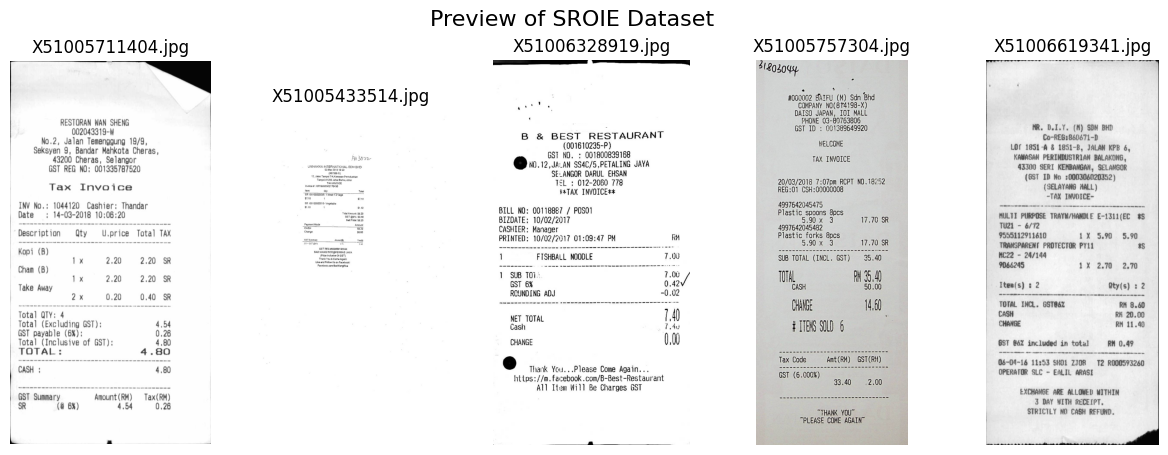

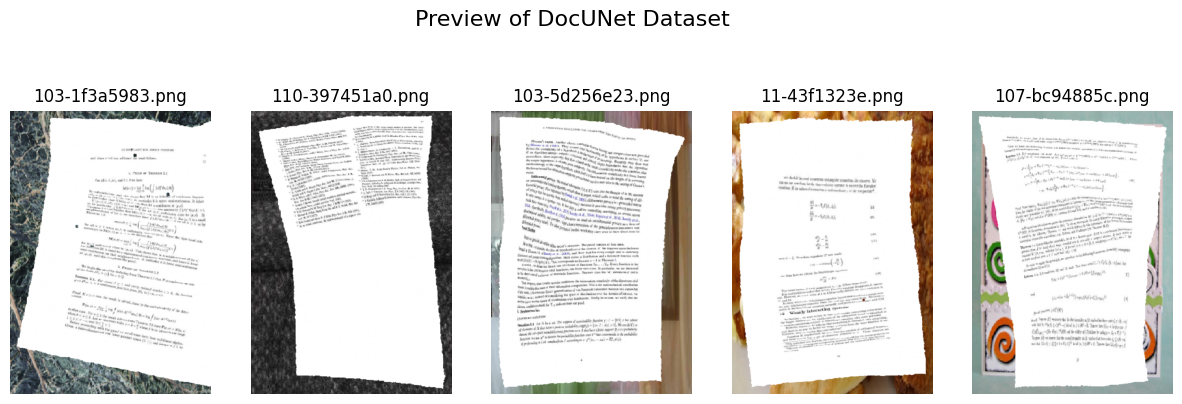

In [7]:
# Display the first 5 images from each dataset
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def display_images(df, dataset_name, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(df))):
        img_path = df['filepath'].iloc[i]
        try:
            img = Image.open(img_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(os.path.basename(img_path))
            plt.axis('off')
        except Exception as e:
            print(f"Error displaying image {img_path}: {e}")
    plt.suptitle(f"Preview of {dataset_name} Dataset", fontsize=16)
    plt.show()

# Display images from SROIE dataset
display_images(sroie_df, "SROIE")

# Display images from DocUNet dataset
display_images(docunet_df, "DocUNet")


## merge dataset sroie & docunet

In [8]:
import random

merged_df = pd.concat([sroie_df, docunet_df], ignore_index=True)

print("\nMerged Dataset:")
print(merged_df.head(20))

# Shuffle the merged DataFrame
merged_df = merged_df.sample(frac=1, random_state=random.seed(42)).reset_index(drop=True)

merged_df.to_csv("merged_dataset.csv", index=False)



Merged Dataset:
            filename                                       filepath    size  \
0   X51005711404.jpg  /content/SROIE2019/train/img/X51005711404.jpg  248957   
1   X51005433514.jpg  /content/SROIE2019/train/img/X51005433514.jpg  135940   
2   X51006328919.jpg  /content/SROIE2019/train/img/X51006328919.jpg  177739   
3   X51005757304.jpg  /content/SROIE2019/train/img/X51005757304.jpg  484462   
4   X51006619341.jpg  /content/SROIE2019/train/img/X51006619341.jpg  321814   
5   X51008114284.jpg  /content/SROIE2019/train/img/X51008114284.jpg  314074   
6   X51005441407.jpg  /content/SROIE2019/train/img/X51005441407.jpg  227326   
7   X51006466065.jpg  /content/SROIE2019/train/img/X51006466065.jpg  195383   
8   X51005719856.jpg  /content/SROIE2019/train/img/X51005719856.jpg  321573   
9   X51008114216.jpg  /content/SROIE2019/train/img/X51008114216.jpg  347225   
10  X51005433494.jpg  /content/SROIE2019/train/img/X51005433494.jpg  194710   
11  X51006388044.jpg  /content/SROI

In [9]:
print(len(merged_df))

15698


# preprocess image

Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Processed 8000 images
Processed 9000 images
Processed 10000 images
Processed 11000 images
Processed 12000 images
Processed 13000 images
Processed 14000 images
Processed 15000 images
  original_filename                                original_filepath  \
0  104-2bb1fa81.png  /content/DocUNet_dataset/image/104-2bb1fa81.png   
1  105-fe9b3ed7.png  /content/DocUNet_dataset/image/105-fe9b3ed7.png   
2   11-eeaa3e4c.png   /content/DocUNet_dataset/image/11-eeaa3e4c.png   
3  104-8abe034c.png  /content/DocUNet_dataset/image/104-8abe034c.png   
4  107-e350060a.png  /content/DocUNet_dataset/image/107-e350060a.png   

           preprocessed_filename  \
0  104-2bb1fa81_preprocessed.png   
1  105-fe9b3ed7_preprocessed.png   
2   11-eeaa3e4c_preprocessed.png   
3  104-8abe034c_preprocessed.png   
4  107-e350060a_preprocessed.png   

              

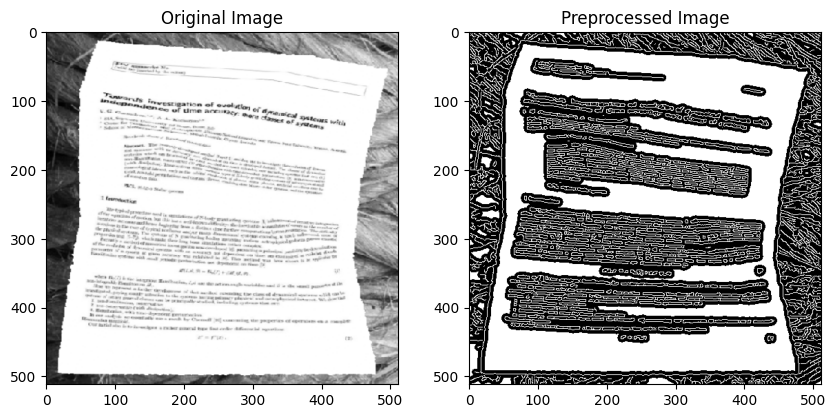

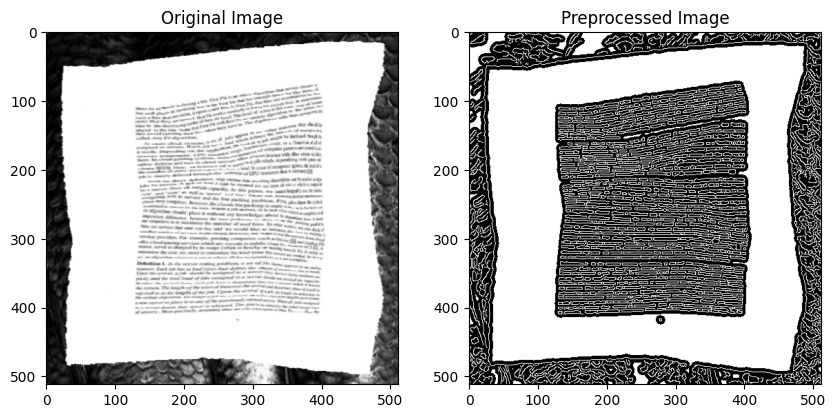

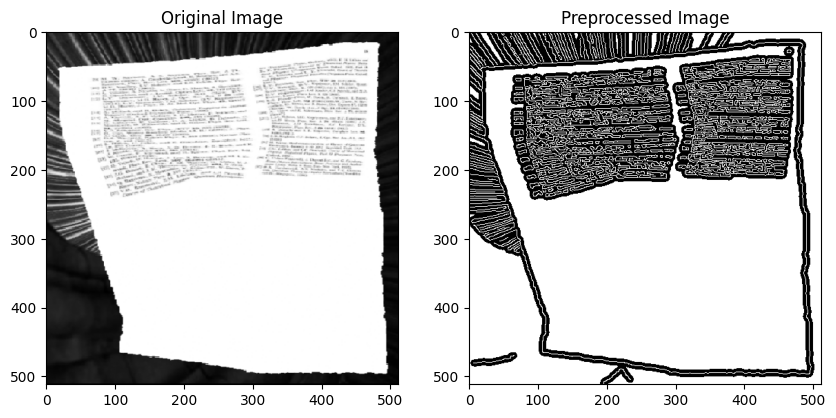

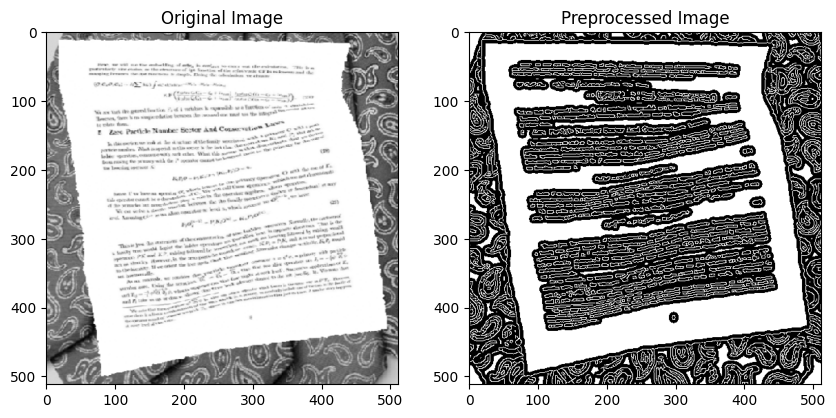

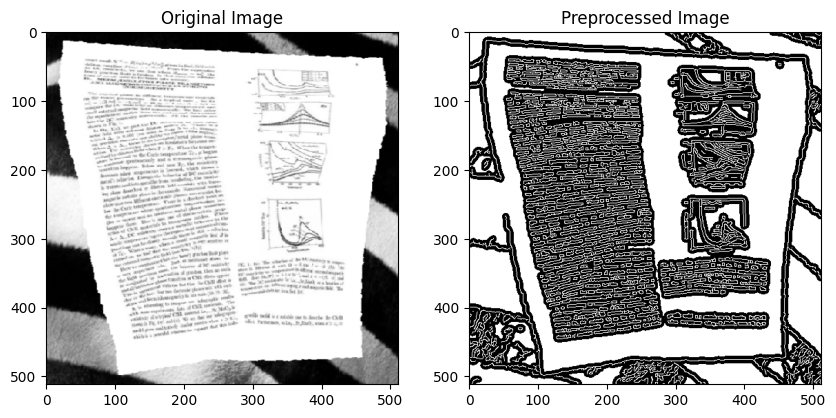

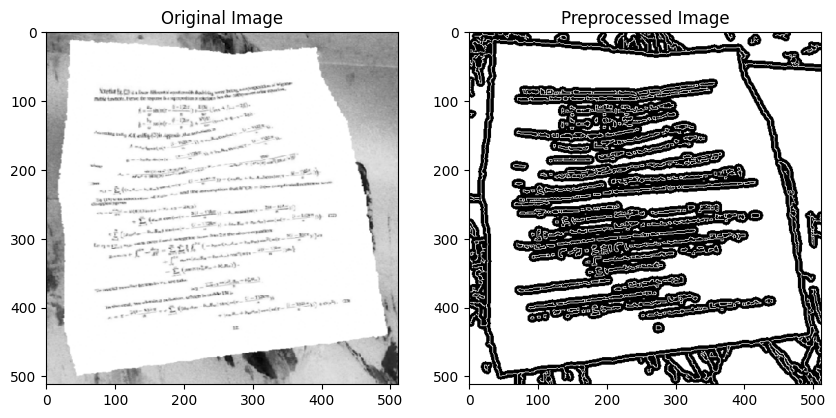

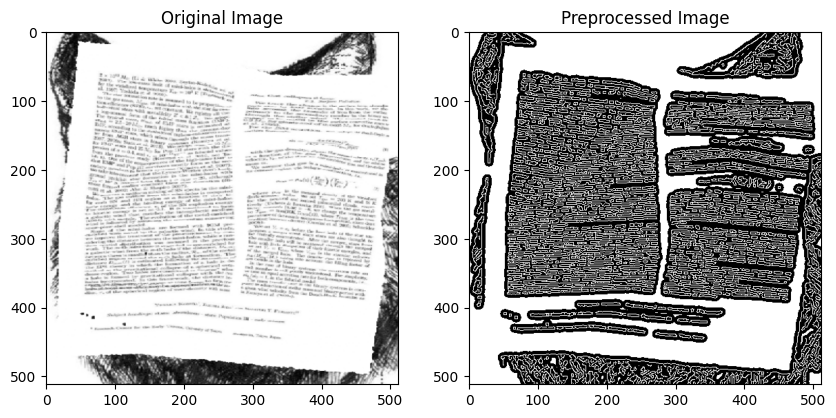

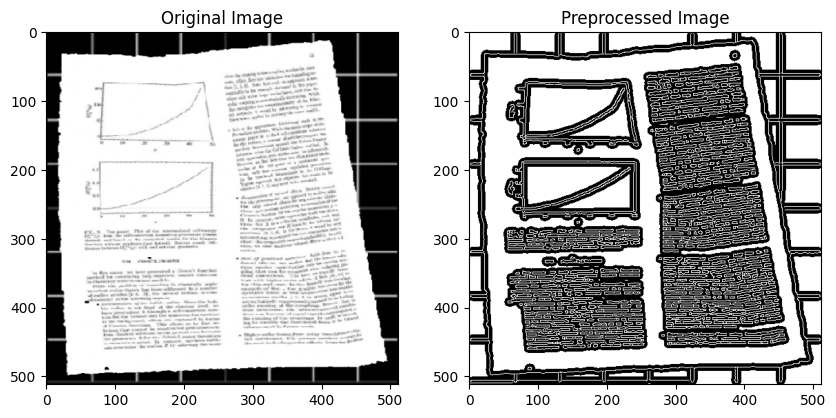

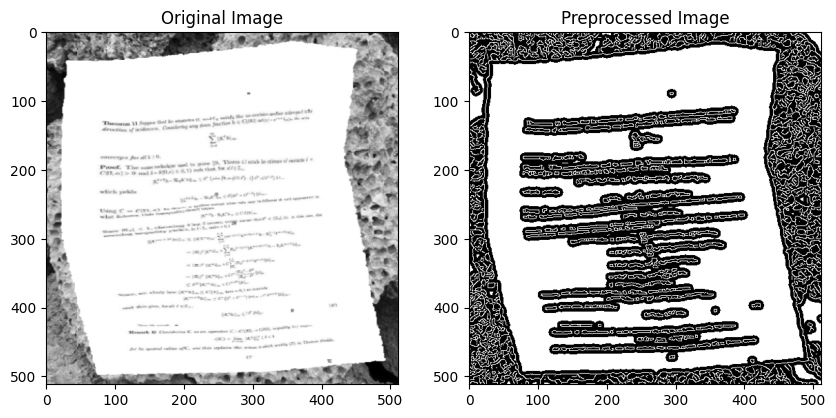

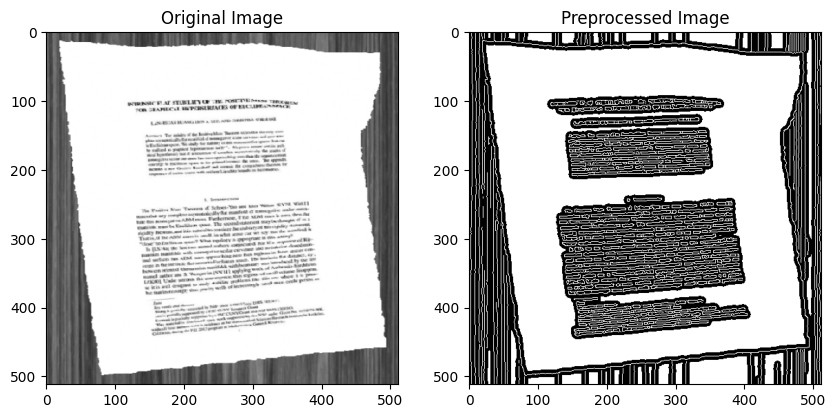

In [10]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

def preprocess_image(image_path, save_dir):
    # Load the image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 512x512
    img = cv2.resize(img, (512, 512))

    # Normalize to [0, 1]
    img = img / 255.0

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(np.uint8(img * 255))
    img = img / 255.0

    # Denoising (Gaussian blur)
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Edge Detection (Canny)
    img = cv2.Canny(np.uint8(img * 255), 50, 150)
    img = img / 255.0

    # Binarization (Adaptive Thresholding)
    img = cv2.adaptiveThreshold(np.uint8(img*255), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 11, 2)
    img = img / 255.0

    # Create filename based on original filename
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    # Save only the final preprocessed image
    output_filename = f"{name}_preprocessed{ext}"
    cv2.imwrite(os.path.join(save_dir, output_filename), img*255)

    return img, output_filename

# Create the directory for preprocessed images
save_dir = "preprocessed_dataset"
os.makedirs(save_dir, exist_ok=True)

# Preprocess images and store information in preprocessed_df
preprocessed_data = []
for i in range(len(merged_df)):
    image_path = merged_df['filepath'][i]
    img, output_filename = preprocess_image(image_path, save_dir)

    preprocessed_data.append([
        merged_df['filename'][i],
        merged_df['filepath'][i],
        output_filename
    ])

    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1} images")

# Create the preprocessed_df DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data,
                              columns=['original_filename', 'original_filepath', 'preprocessed_filename'])
preprocessed_df['preprocessed_filepath'] = preprocessed_df['preprocessed_filename'].apply(
    lambda x: os.path.join(save_dir, x))

print(preprocessed_df.head())


for i in range(10):
    image_path = merged_df['filepath'][i]
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original_img = cv2.resize(original_img, (512, 512))
    preprocessed_img, _ = preprocess_image(image_path, save_dir)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title('Preprocessed Image')

    plt.show()

In [ ]:
# for i in range(100):
#     image_path = merged_df['filepath'][i]
#     original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     original_img = cv2.resize(original_img, (512, 512))
#     preprocessed_img, _ = preprocess_image(image_path, save_dir)

#     plt.figure(figsize=(10, 5))

#     plt.subplot(1, 2, 1)
#     plt.imshow(original_img, cmap='gray')
#     plt.title('Original Image')

#     plt.subplot(1, 2, 2)
#     plt.imshow(preprocessed_img, cmap='gray')
#     plt.title('Preprocessed Image')

#     plt.show()

In [11]:
import os
from PIL import Image

preprocessed_image_dir = "preprocessed_dataset"

# Function to get image files from a folder
def get_images_from_folder(folder_path):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_files.append(os.path.join(root, file))
    return image_files


preprocessed_images = get_images_from_folder(preprocessed_image_dir)

print(f"Number of preprocessed images: {len(preprocessed_images)}")

for image_path in preprocessed_images[:5]:  # Check the shape of the first 5 images
    try:
      img = Image.open(image_path)
      width, height = img.size
      print(f"Image: {image_path}, Shape: ({width}, {height})")
    except Exception as e:
      print(f"Error processing {image_path}: {e}")


Number of preprocessed images: 15698
Image: preprocessed_dataset/X51005447850_preprocessed.jpg, Shape: (512, 512)
Image: preprocessed_dataset/108-f3bd2736_preprocessed.png, Shape: (512, 512)
Image: preprocessed_dataset/106-ea920825_preprocessed.png, Shape: (512, 512)
Image: preprocessed_dataset/107-d58f916b_preprocessed.png, Shape: (512, 512)
Image: preprocessed_dataset/105-3ed26d8a_preprocessed.png, Shape: (512, 512)


# splitting dataset

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
preprocessed_image_dir = "preprocessed_dataset"
train_dir = "training_dataset"
val_dir = "validation_dataset"
test_dir = "testing_dataset"

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the list of preprocessed images
preprocessed_images = [f for f in os.listdir(preprocessed_image_dir) if os.path.isfile(os.path.join(preprocessed_image_dir, f))]

# Split the dataset (70% train, 15% validation, 15% test)
train_files, temp_files = train_test_split(preprocessed_images, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

# Copy the images to their respective folders
def copy_images(image_files, source_dir, destination_dir):
    for image_file in image_files:
        source_path = os.path.join(source_dir, image_file)
        destination_path = os.path.join(destination_dir, image_file)
        shutil.copy2(source_path, destination_path)

copy_images(train_files, preprocessed_image_dir, train_dir)
copy_images(val_files, preprocessed_image_dir, val_dir)
copy_images(test_files, preprocessed_image_dir, test_dir)

print(f"Training dataset size: {len(train_files)}")
print(f"Validation dataset size: {len(val_files)}")
print(f"Testing dataset size: {len(test_files)}")


Training dataset size: 10988
Validation dataset size: 2355
Testing dataset size: 2355


# image augmentation

In [13]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 14.2 MB/s eta 0:00:00


In [14]:
!pip install imgaug --upgrade

Copying original training images: 100%|██████████| 10988/10988 [00:01<00:00, 7067.39it/s]


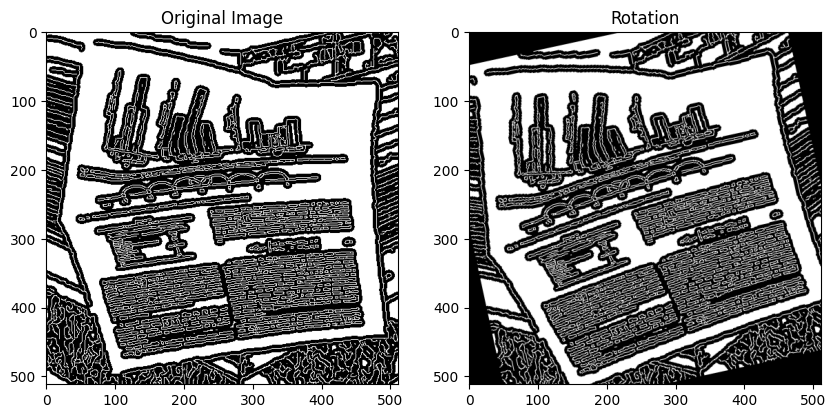

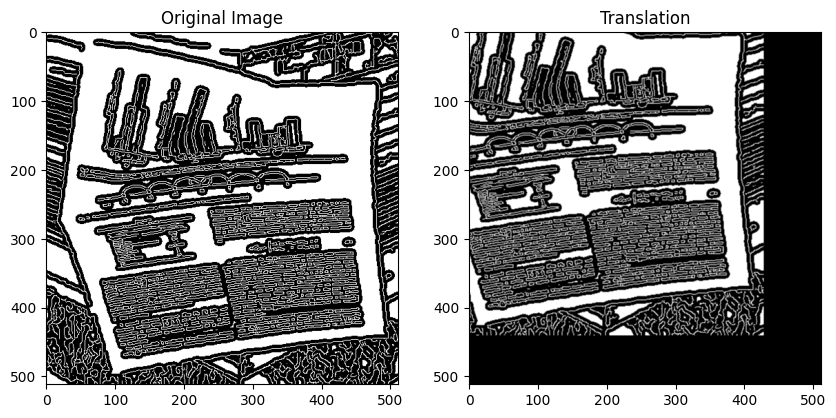

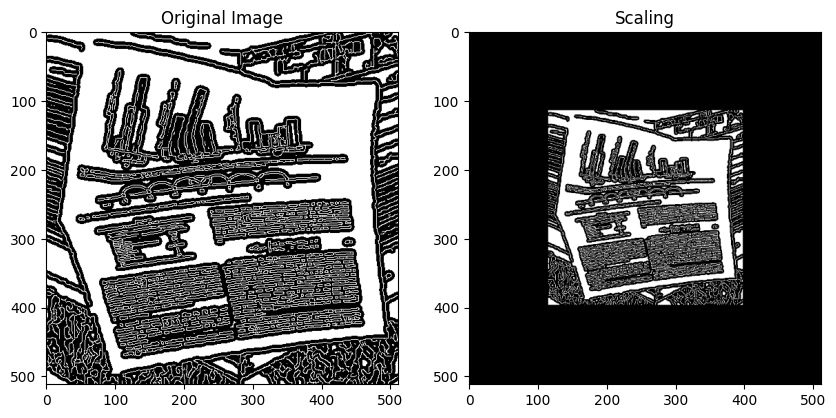

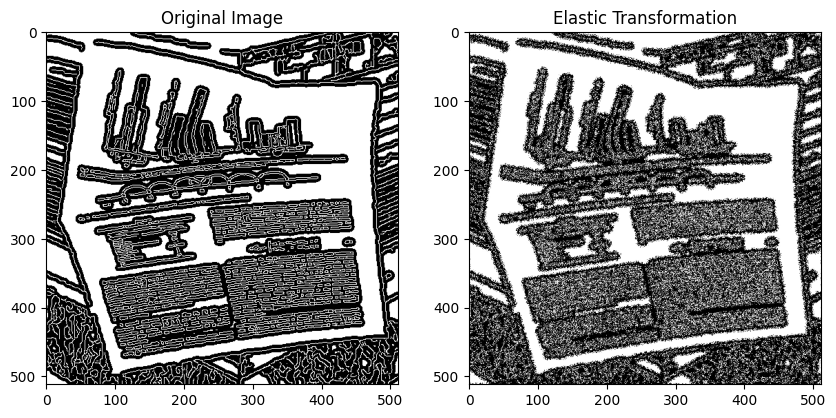

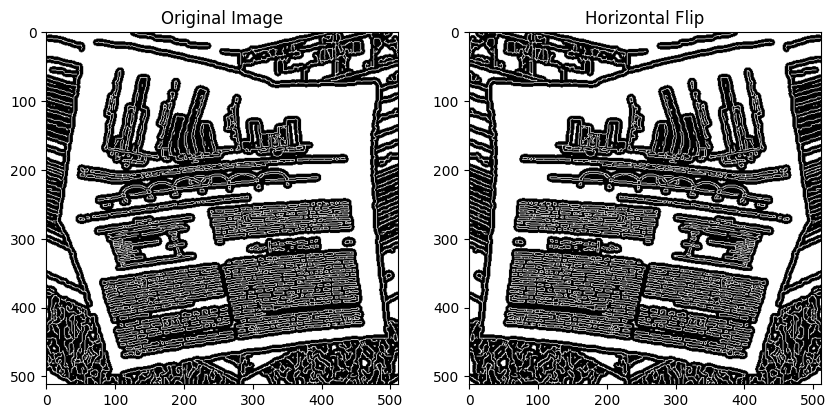

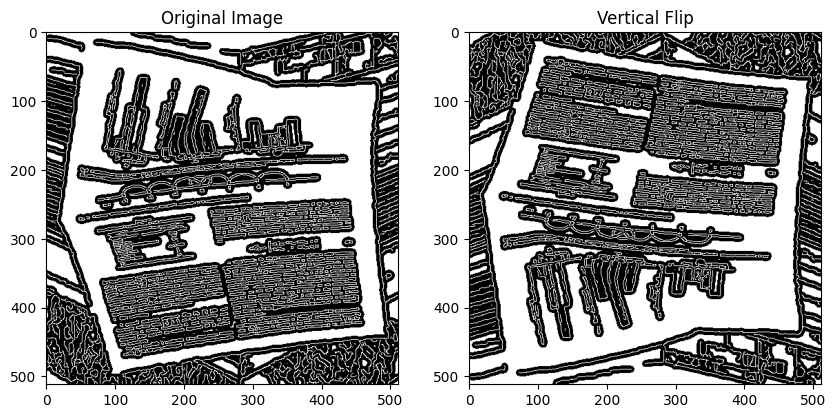

In [15]:
# image augmentation only for training data
# - (rotate=(-30, 30)),
# - (translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
# - scale=(0.5, 1.5)),
# - ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
# - Fliplr(1.0),
# - Flipud(1.0)

from imgaug import augmenters as iaa
from tqdm import tqdm
import os
import random
import shutil

# Define augmentation sequence
augmentations = [
    iaa.Affine(rotate=(-30, 30)),
    iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
    iaa.Fliplr(1.0),
    iaa.Flipud(1.0)
]

augmentation_names = [
    "Rotation",
    "Translation",
    "Scaling",
    "Elastic Transformation",
    "Horizontal Flip",
    "Vertical Flip"
]

seq = iaa.Sequential(augmentations)

# Define paths
train_dir = "training_dataset"
augmented_train_dir = "augmented_training_dataset"

# Create augmented training directory
os.makedirs(augmented_train_dir, exist_ok=True)

# Get training images
train_images = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]
image_file = random.choice(train_images)
image_path = os.path.join(train_dir, image_file)
num_images_to_augment = len(train_images) // 2

# Augment images
for image_file in tqdm(random.sample(train_images, num_images_to_augment), desc="Augmenting images"):
    image_path = os.path.join(train_dir, image_file)
    try:
      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      images_aug = seq(images=[image])
      augmented_image = images_aug[0]
      augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)
      augmented_image_path = os.path.join(augmented_train_dir, f"augmented_{image_file}")
      cv2.imwrite(augmented_image_path, augmented_image)

    except Exception as e:
      print(f"Error augmenting {image_path}: {e}")

# Copy original training images to augmented directory
for image in tqdm(train_images, desc = "Copying original training images"):
  original_image_path = os.path.join(train_dir, image)
  augmented_image_path = os.path.join(augmented_train_dir, image)
  shutil.copy2(original_image_path, augmented_image_path)

# Preview each augmentation
for i, augmentation in enumerate(augmentations):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    augmented_image = augmentation(image=image)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(augmented_image)
    plt.title(augmentation_names[i])

    plt.show()


In [16]:
augmented_train_dir = "augmented_training_dataset"
augmented_images = [f for f in os.listdir(augmented_train_dir) if os.path.isfile(os.path.join(augmented_train_dir, f))]
print(f"Number of images in augmented_training_dataset: {len(augmented_images)}")

Number of images in augmented_training_dataset: 16482


In [17]:

import shutil
import os

def zip_folder(folder_path, zip_filename):
  shutil.make_archive(zip_filename, 'zip', folder_path)

# Zip the folders
zip_folder("augmented_training_dataset", "augmented_training_dataset")
zip_folder("testing_dataset", "testing_dataset")
zip_folder("validation_dataset", "validation_dataset")

In [18]:
import os

augmented_train_dir = "augmented_training_dataset"
size = 0
for path, dirs, files in os.walk(augmented_train_dir):
    for f in files:
        fp = os.path.join(path, f)
        size += os.path.getsize(fp)

print(f"Size of augmented_training_dataset: {size} bytes")


Size of augmented_training_dataset: 2115002712 bytes


# define model

In [ ]:
!pip install tensorflow==2.14.0
!pip install ml_dtypes==0.3.0 --force-reinstall --no-cache-dir
!pip install --upgrade jax
!pip install --upgrade tensorflow tensorflow-addons
!pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install --upgrade "jaxlib[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully

In [ ]:
!pip install numpy==1.26.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatib

In [ ]:
import numpy as np
np.__version__

'1.26.4'

In [ ]:
import tensorflow as tf
import ml_dtypes
import cv2
import tf_keras as keras
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Activation, Multiply, Add
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import Mean

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [ ]:
# Define the residual block
def residual_block(x, filters):
    # First convolution layer
    conv1 = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    conv1 = Activation('relu')(conv1)

    # Second convolution layer
    conv2 = Conv2D(filters, kernel_size=(3, 3), padding='same')(conv1)
    conv2 = Activation('relu')(conv2)

    # Skip connection
    skip = Add()([x, conv2])
    return skip

# Define the attention mechanism
def attention_block(x, g, filters):
    # Query and Key
    theta_x = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    phi_g = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(g)

    # Add and apply ReLU
    add_xg = Add()([theta_x, phi_g])
    add_xg = Activation('relu')(add_xg)

    # Attention map
    psi = Conv2D(1, kernel_size=(1, 1), strides=(1, 1), padding='same')(add_xg)
    psi = Activation('sigmoid')(psi)

    # Apply attention
    return Multiply()([x, psi])


# Define the DocUNet model
def build_docunet(input_shape=(512, 512, 1)):
    inputs = Input(input_shape)

    # Encoder
    x = Conv2D(64, kernel_size=(3, 3), padding='same')(inputs)
    x = Activation('relu')(x)
    res1 = residual_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(res1)

    x = Conv2D(128, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    res2 = residual_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(res2)

    x = Conv2D(256, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    res3 = residual_block(x, 256)
    x = MaxPooling2D(pool_size=(2, 2))(res3)

    x = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    res4 = residual_block(x, 512)
    x = MaxPooling2D(pool_size=(2, 2))(res4)

    # Bottleneck with attention
    g = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    g = Activation('relu')(g)
    g = attention_block(g, x, 512)

    # Decoder
    x = Conv2DTranspose(512, kernel_size=(3, 3), strides=(2, 2), padding='same')(g)
    x = concatenate([x, res4])
    x = Activation('relu')(x)

    x = Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, res3])
    x = Activation('relu')(x)

    x = Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, res2])
    x = Activation('relu')(x)

    x = Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, res1])
    x = Activation('relu')(x)


    # Output layer
    outputs = Conv2D(1, kernel_size=(1, 1), activation='sigmoid')(x)

    # Build the model
    model = Model(inputs, outputs)
    return model

# Compile the model
model = build_docunet()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 512, 512,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 512, 512,  │          0 │ conv2d[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 512, 512,  │          0 │ conv2d_1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 512, 512,  │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 512, 512,  │          0 │ conv2d_2[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 512, 512,  │          0 │ activation[0][0], │
│                     │ 64)               │            │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ add[0][0]         │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256, 256,  │          0 │ conv2d_3[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 256, 256,  │    147,584 │ activation_3[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 256, 256,  │          0 │ conv2d_4[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 256, 256,  │    147,584 │ activation_4[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 256, 256,  │          0 │ conv2d_5[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 256, 256,  │          0 │ activation_3[0][… │
│                     │ 128)              │            │ activation_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ add_1[0][0]     

 Total params: 16,161,218 (61.65 MB)

 Trainable params: 16,161,218 (61.65 MB)

 Non-trainable params: 0 (0.00 B)

# running model

In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for the datasets
train_dir = 'augmented_training_dataset'
val_dir = 'validation_dataset'
test_dir = 'testing_dataset'

# Create subfolders ('images') if they don't exist
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(os.path.join(directory, 'images'), exist_ok=True)

# Move images to subfolders ('images')
def move_images_to_subfolder(directory):
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            source_path = os.path.join(directory, filename)
            destination_path = os.path.join(directory, 'images', filename)
            os.rename(source_path, destination_path)

move_images_to_subfolder(train_dir)
move_images_to_subfolder(val_dir)
move_images_to_subfolder(test_dir)


image_size = (512, 512)
batch_size = 8
epochs = 20
patience = 10

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)


# Data generators for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training, validation, and testing data using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='input',
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='input',
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='input',
    seed=42
)

# Train the model, using the numpy_to_tensor function to convert data
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 16482 images belonging to 1 classes.
Found 2355 images belonging to 1 classes.
Found 2355 images belonging to 1 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2979s 1s/step - accuracy: 0.8446 - loss: 0.1523 - val_accuracy: 0.9923 - val_loss: 0.0031
Epoch 2/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2827s 1s/step - accuracy: 0.8751 - loss: 0.0620 - val_accuracy: 0.9923 - val_loss: 0.0015
Epoch 3/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2784s 1s/step - accuracy: 0.8773 - loss: 0.0612 - val_accuracy: 0.9923 - val_loss: 0.0011
Epoch 4/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2792s 1s/step - accuracy: 0.8780 - loss: 0.0577 - val_accuracy: 0.9923 - val_loss: 7.6867e-04
Epoch 5/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 2792s 1s/step - accuracy: 0.8750 - loss: 0.0585 - val_accuracy: 0.9923 - val_loss: 6.4027e-04
Epoch 6/20
 214/2061 ━━━━━━━━━━━━━━━━━━━━ 39:54 1s/step - accuracy: 0.8762 - loss: 0.0583

# eval model

In [ ]:
predictions = model.predict(test_generator)

# Calculate SSIM and PSNR for each image in the test set
ssim_scores = []
psnr_scores = []

for i in range(len(test_generator)):
    # Get the original and predicted images for the current batch
    original_images, _ = test_generator[i]
    predicted_images = predictions[i*test_generator.batch_size:(i+1)*test_generator.batch_size]

    for j in range(original_images.shape[0]):
        original_image = np.uint8(original_images[j, :, :, 0] * 255)
        predicted_image = np.uint8(predicted_images[j, :, :, 0] * 255)

        # Calculate SSIM and PSNR
        ssim_score = ssim(original_image, predicted_image, data_range=255)
        psnr_score = psnr(original_image, predicted_image, data_range=255)

        ssim_scores.append(ssim_score)
        psnr_scores.append(psnr_score)

# Print the average SSIM and PSNR scores
print(f"Average SSIM: {np.mean(ssim_scores)}")
print(f"Average PSNR: {np.mean(psnr_scores)}")


# save model

In [ ]:
model.save("ta_ileene.h5")